### 数据预处理

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. 数据加载与粗略查看
- 数据加载
- 数据粗略查看

##### 1.1 数据加载

In [214]:
# csv文件
df = pd.read_csv('titanic.csv')
# 但有时数据不是简单的csv，它按照文本保存，如“ID||texttexttexttext”这样的一条数据需要将中间的“||”当作分隔符，读取方式如下：
# train = pd.read_csv('../input/training_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
# 更多参数应查阅pandas文档

##### 1.2 数据粗略查看

In [215]:
df.head(5)     #显示前5行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
df.tail(5)     #显示后5行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [217]:
df.columns    #查看列名

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [218]:
df.info()     #查看各字段的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
df.shape      #查看数据集行列分布，几行几列

(891, 12)

In [220]:
df.describe() #查看数据的大体情况

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 2. 处理丢失的数据
- 处理丢失值
    - 找到丢失位置
    - 处理
        - 填补
        - 忽略
- 处理重复值
- 处理偏离值
    - 查找偏离值
    - 处理
        - 删除
        - 标准化/归一化

##### 2.1 处理丢失值

###### 2.1.1 找到丢失位置

In [221]:
# 输出每个列丢失值也即值为NaN的数据和，并从多到少排序
total = df.isnull().sum().sort_values(ascending=False)
print(total)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [222]:
# 也可以输出百分比
percent =(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

             Total   Percent
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
PassengerId      0  0.000000
Survived         0  0.000000
Pclass           0  0.000000
Name             0  0.000000
Sex              0  0.000000
SibSp            0  0.000000
Parch            0  0.000000
Ticket           0  0.000000
Fare             0  0.000000


###### 2.1.2 处理-填补

In [223]:
# 使用中位数填补
df['Age'] = df['Age'].fillna(df['Age'].median())

In [224]:
# 使用平均数填补
df['Age'] = df['Age'].fillna(df['Age'].mean())

###### 2.1.3 处理-忽略

In [225]:
# 去掉一列: 当缺失行数比较多或该特征不重要的时候
df = df.drop(['Cabin'], axis = 1)

In [226]:
#去掉这个特征为空的行：当缺失行数比较少的时候
#当然后面可以加上inplace=True表示直接就在内存中替换了不用再赋值个train_new，但是本人多次删除掉几个行，发现有问题时又需要重新建立已经分析好的train，很浪费时间，个人认为还是重新开辟一个比较好
df_new = df.drop(df[df['Embarked'].isnull()].index)

##### 2.2 处理重复值

In [227]:
df_new = df_new.drop_duplicates()

##### 2.3 处理偏离值

###### 2.3.1 寻找偏离值

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


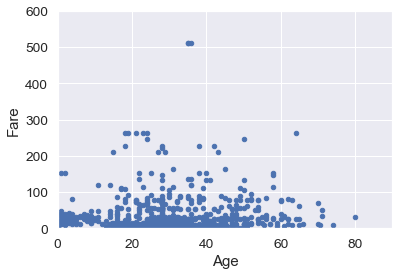

In [228]:
#bivariate analysis saleprice/grlivarea
var = 'Age'
data = pd.concat([df['Fare'], df[var]], axis=1)
data.plot.scatter(x=var, y='Fare', xlim=(0,90), ylim=(0,600));

##### 2.3.2 处理-删除

In [229]:
df.sort_values(by = 'Fare', ascending = False)[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [230]:
df = df.drop(df[df['PassengerId'] == 259].index)
df = df.drop(df[df['PassengerId'] == 738].index)

###### 2.3.3 处理-保留
当然并不是所有的偏离值都需要删除，具体需要在分析之后选择处理方式。这里将偏离值保留下来并不是原封不动保留，而需要做标准化或归一化处理，具体的处理方式可查看最后一节数据转换、标准化、归一化

#### 3. 数据统计

In [231]:
# 统计某一列中各个元素值出现的次数
df['Pclass'].value_counts()  

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [232]:
# 数据的偏斜度
df['Pclass'].skew()

-0.6369977585999191

In [233]:
# 数据的峰度
df['Pclass'].kurt()

-1.2694374832322646

In [234]:
# 计算两个列的相关度
df['Age'].corr(df['Fare']) 

0.09821633399014416

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


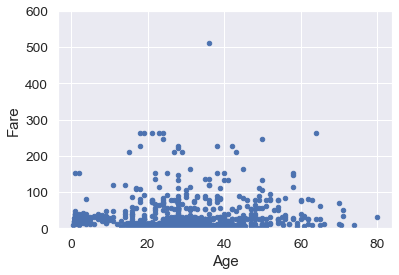

In [235]:
# 观察两个列的值的二维图
x = 'Age'; y = 'Fare'
data = pd.concat([df[y], df[x]], axis=1)
data.plot.scatter(x=x, y=y, ylim=(0,600));

<AxesSubplot:>

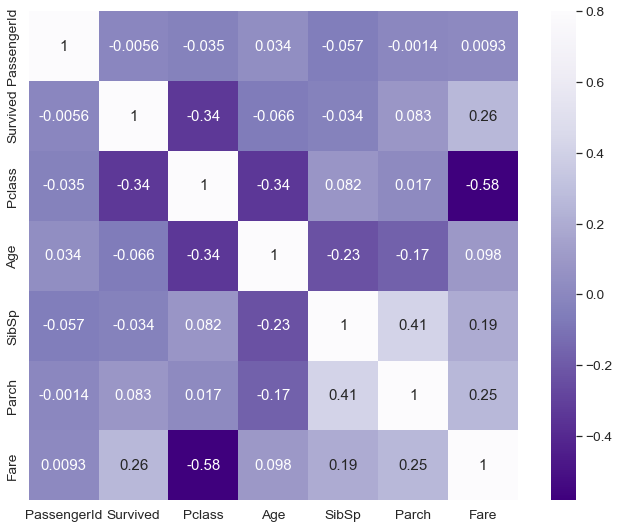

In [236]:
# 计算所有特征值每两个之间的相关系数，并做热力图
corrmat = df.corr() # 得到相关系数
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True, annot=True, cmap = 'Purples_r') # 热力图

<AxesSubplot:>

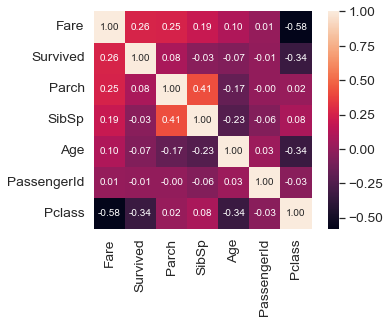

In [237]:
#取出相关性最大的前十个，做出热点图表示
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Fare')['Fare'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,    xticklabels=cols.values)

#### 4. 特征值的合并、连接
- 分组
- 合并
- 连接

##### 4.1 分组

In [238]:
# 按照船舱等级分组---------------------一个特征值
df.groupby('Pclass',as_index=False)
# 按照船舱等级与船费分组---------------两个特征值
df.groupby(['Pclass','Fare'],as_index=False)
# 船舱等级、船费、年龄-----------------三个特征值
df.groupby(['Pclass','Fare','Age'],as_index=False)
# 跟MSSubClass进行分组，并求分组后的平均值
test = df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()
# 选取特定的属性的某个值然后进行分类
df[df['Age']==22].groupby(['Pclass'],as_index=False)
print(test)

   Pclass       Fare
0       1  80.153057
1       2  20.662183
2       3  13.675550


##### 4.2 合并

In [239]:
# 获得分组后，统计分组中'end_loc'的数量返回为一列由‘userid’和‘user_count’组成的新的DataFrame
age_count = df.groupby('Pclass',as_index=False)['Age'].agg({'age_count':'count'})
# 将获得的新的DataFrame合并到train，更多的merge参数请查阅文档
new_df = pd.merge(df, age_count, on=['Pclass'], how='left')
print(age_count)

   Pclass  age_count
0       1        214
1       2        184
2       3        491


##### 4.3 连接

In [240]:
# 将训练数据与测试数据连接起来，以便一起进行数据清洗。
# 这里需要注意的是，如果没有后面的ignore_index=True，那么index的值在连接后的这个新数据中是不连续的，如果要按照index删除一行数据，可能会发现多删一条。
train = df[:600]
test = df[600:]
merge_data = pd.concat([train, test], ignore_index=True)  

# 另一种合并方式，按列名字进行合并。
all_data = pd.concat((df.loc[:,'Pclass':'Age'], test.loc[:,'Pclass':'Age']))  
all_data.head()

,Pclass,Name,Sex,Age
0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,3,"Allen, Mr. William Henry",male,35.0


#### 5. 数据转换、标准化、归一化
- 数据转换
- 标准化
- 归一化

##### 5.1 数据转换

In [241]:
# 浮点型数值转换为整型
df['Age'] = df['Age'].astype(int)

In [242]:
# 字符串的替换--映射
df['Sex'] = df['Sex'].map({'female':0,'male':1}).astype(int)
# 一般建议将map拿出来
# sex_mapping = {"female": 0, "male": 1}
# df['Sex'] = df['Sex'].map(sex_mapping)

In [243]:
# one-hot独热编码
df = pd.get_dummies(df) 

In [244]:
# 将连续型特征值分块，每一块用数字标识
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)

In [245]:
# df['Age'] = np.log(df['Age'])
# 而有时这样的log不可行，就需要使用log（x+1）来 处理
# 原因：https://blog.csdn.net/liyuanbhu/article/details/8544644
df['Age'] = np.log1p(df['Age'])

In [249]:
# 将偏斜度大于0.75的数值列log转换，使之尽量符合正态分布
# numeric_feats = ['Age', 'Fare']
# skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index
# df[skewed_feats] = np.log1p(df[skewed_feats])

##### 5.2 标准化
见**数据预处理-标准化与归一化**

##### 5.3 归一化
见**数据预处理-标准化与归一化**

#### 6. 参考资料
1. [数据预处理](https://blog.csdn.net/u011094454/article/details/77618604)
2. [唐宇迪数据分析](https://study.163.com/course/courseMain.htm?courseId=1003590004&share=1&shareId=1451772796)